# Handwritten Text Recognition - OCR - CNN

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import random
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [3]:
# Data Acquisition
DATA = "../data/raw"
LETS = list("SINO")
NUM_LETS = len(LETS)
IMG_SIZE = 100

In [4]:
# Turns images into black and white
def black_and_white(image, threshold):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)[1]
    kernel = np.ones((2,2))
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return closing

In [8]:
# Loading all letter images, resizing and labeling them
def load_letters(path, letters_list):
    letters = []
    # Looping through each letter folder
    for let in letters_list:
        images = os.listdir(os.path.join(path, let))
        # Looping through each image within a specific letter folder
        for pic in images:
            # Reading letter image, turning it to gray scale and resizing it
            img = cv2.imread(os.path.join(path, let, pic))
            resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            thresh = black_and_white(resized, 120)
            
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#             _, threshold = cv2.threshold(resized, 120, 255, cv2.THRESH_BINARY)
            
            # Saving letter image array and target into a list
            letters.append([thresh, letters_list.index(let)])
            #letters.append([threshold, let])
    
    return letters
        
letters = load_letters(DATA, LETS)
print(len(letters))

120


In [9]:
# Checking how many images were read per letter
def check_loaded_data(loaded_letters_list, individual_letters_list):
    y = [target[1] for target in loaded_letters_list]
    res = [[letter, y.count(individual_letters_list.index(letter))] for letter in individual_letters_list]
    #res = [[letter, y.count(letter)] for letter in individual_letters_list]
    print(res)

check_loaded_data(letters, LETS)

[['S', 30], ['I', 30], ['N', 30], ['O', 30]]


In [10]:
# Checking loaded images
def shuffle(list_to_shuffle):
    random.shuffle(list_to_shuffle)
    return list_to_shuffle

shuffled = shuffle(letters)
print(len(shuffled))

120


In [11]:
# Splitting training data with its correspondent label
def split_xy(training_data):
    X, y = [], []
    for features, label in training_data:
        X.append(features)
        y.append(label)

    return X, y

X, y = split_xy(shuffled)

print(len(X))
print(y[0])
print(X[0])

120
1
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [12]:
# Converting y list into a categorical array, 0 and 1
y = tf.keras.utils.to_categorical(y, NUM_LETS)
print(y)
print(y.shape)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1.

In [13]:
# Turning lists into arrays
#print(len(X), len(y))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 grayscale, 3 colored images
#y = np.array(y)
print(X.shape, y.shape)

(120, 100, 100, 1) (120, 4)


In [14]:
# Normalizing the training data
X = tf.keras.utils.normalize(X, axis=1)
print(X.shape)

(120, 100, 100, 1)


In [15]:
# Model's name
NAME = f"OCR-CNN-{int(time.time())}"
print(NAME)

# Model instantiation and layers definition
model = Sequential() # instatiating the NN

# Adding first 2D convolution layer
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:], activation="relu")) # X.shape[1:] → (100, 100, 1)
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding second 2D convolution layer
model.add(Conv2D(64, (3,3), activation="relu"))# don't have to specify input shape in additional layers.
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding third 2D convolution layer
model.add(Conv2D(64, (3,3), activation="relu"))# don't have to specify input shape in additional layers.
model.add(MaxPooling2D(pool_size=(2,2)))
          
# Adding flattened dense layer
model.add(Flatten())
          
# Adding output layer, 4 unit, activation softmax
model.add(Dense(NUM_LETS))
model.add(Activation("softmax"))

# Setting up tensorboard logs
tb = TensorBoard(log_dir=f"../data/logs/{NAME}")
          
# Model parameters
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

OCR-CNN-1586182912


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [17]:
# Model fitting
hist = model.fit(X, y, batch_size=16, epochs=10, validation_split=0.2, callbacks=[tb])

Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 2s 16ms/sample - loss: 1.3855 - accuracy: 0.2708 - val_loss: 1.3701 - val_accuracy: 0.4167
Epoch 2/10
96/96 [==============================] - 1s 10ms/sample - loss: 1.3283 - accuracy: 0.5208 - val_loss: 1.2752 - val_accuracy: 0.4583
Epoch 3/10
96/96 [==============================] - 1s 9ms/sample - loss: 1.0487 - accuracy: 0.7917 - val_loss: 0.9071 - val_accuracy: 0.7917
Epoch 4/10
96/96 [==============================] - 1s 10ms/sample - loss: 0.4525 - accuracy: 0.9583 - val_loss: 0.2962 - val_accuracy: 0.9167
Epoch 5/10
96/96 [==============================] - 1s 10ms/sample - loss: 0.1305 - accuracy: 0.9688 - val_loss: 0.1493 - val_accuracy: 0.9583
Epoch 6/10
96/96 [==============================] - 1s 9ms/sample - loss: 0.0555 - accuracy: 0.9792 - val_loss: 0.1712 - val_accuracy: 0.9583
Epoch 7/10
96/96 [==============================] - 1s 10ms/sample - loss: 0.0348 - accuracy: 0.9896

In [18]:
loss, acc = model.evaluate(X, y)

120/120 [==============================] - 0s 3ms/sample - loss: 0.0419 - accuracy: 0.9833


In [19]:
model_path = "../data/model"
model_name = "model"
# saving the model
def save_model_h5(model, model_path, model_name):
    model.save(os.path.join(model_path, f"{model_name}.h5"))
    print(f"Saved model to {model_path}/{model_name}.h5")
    
# loading the model
def load_model_h5(model_path, model_name):
    try:
        # Loading H5 file
        print(os.path.join(model_path, f"{model_name}.h5"))
        loaded_model = load_model(os.path.join(model_path, f"{model_name}.h5"))
        print("Model loaded successfully")
        return loaded_model
    except  Exception as e:
        print("Model couldn't be loaded. Did you import keras load_model function?")
        

save_model_h5(model, model_path, model_name)
loaded_model = load_model_h5(model_path, model_name)

Saved model to ../data/model/model.h5
../data/model/model.h5
Model loaded successfully


/home/nicolas/miniconda3/envs/deep_envs/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[[1. 0. 0. 0.]]')

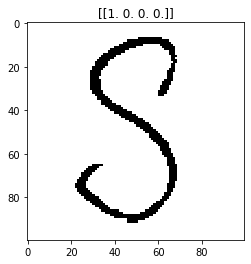

(1, 100, 100, 1)


Text(0.5, 1.0, '[[0. 1. 0. 0.]]')

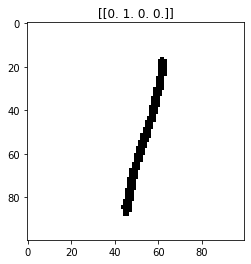

(1, 100, 100, 1)


Text(0.5, 1.0, '[[0. 0. 1. 0.]]')

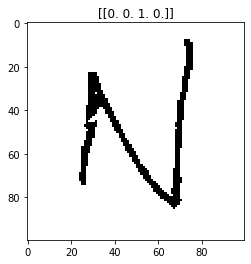

(1, 100, 100, 1)


Text(0.5, 1.0, '[[0. 0. 0. 1.]]')

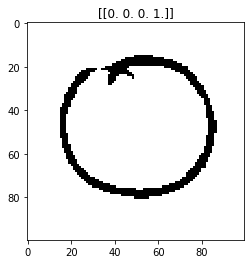

(1, 100, 100, 1)


In [20]:
testpath = "../data/test"
testimages = os.listdir(testpath)
for test in testimages:
    img = cv2.imread(os.path.join(testpath, test))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
    _, threshold = cv2.threshold(resized, 130, 255, cv2.THRESH_BINARY)

    plt.imshow(threshold, cmap="gray")
    
    threshold = np.array(threshold).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    p = model.predict(threshold)
    plt.title(p)
    plt.show()
    print(threshold.shape)